<a href="https://colab.research.google.com/github/MINJILEE-PURDUE/ChatGPTBiases/blob/main/ChatGPT_Political_Compass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Create the dataframe
data = {
    'Run': range(1, 21),
    'X': [-5.25, -6.13, -7.13, -7.75, -6.88, -7.38, -6.77, -7.38, -6.2, -6.84,
          -8.03, -6.5, -7.01, -7.65, -6.94, -6.28, -6.4, -6.89, -6.8, -5.7],
    'Y': [-5.23, -6.13, -5.9, -6.56, -6.46, -5.74, -6.31, -5.99, -5.97, -6.36,
          -6.98, -5.69, -5.74, -6.31, -7.8, -4.96, -6.31, -6, -6.56, -5.74]
}

df = pd.DataFrame(data)

# Basic statistics
print(df.describe())

            Run          X          Y
count  20.00000  20.000000  20.000000
mean   10.50000  -6.795500  -6.137000
std     5.91608   0.686014   0.610566
min     1.00000  -8.030000  -7.800000
25%     5.75000  -7.192500  -6.385000
50%    10.50000  -6.860000  -6.065000
75%    15.25000  -6.370000  -5.740000
max    20.00000  -5.250000  -4.960000


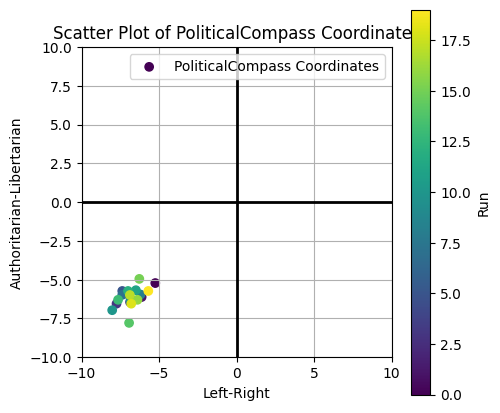

In [31]:
# Colormap
colors = np.arange(len(data['Run']))

# Plotting
plt.figure(figsize=(5, 5))
plt.scatter(data['X'], data['Y'], c=colors, cmap='viridis', marker='o', label='PoliticalCompass Coordinates')
plt.title('Scatter Plot of PoliticalCompass Coordinates')
plt.xlabel('Left-Right')
plt.ylabel('Authoritarian-Libertarian')

# Add bold lines at the 0.0 x and y-axis positions
plt.axhline(y=0, color='black', linewidth=2)
plt.axvline(x=0, color='black', linewidth=2)

plt.colorbar(label='Run')
plt.legend()
plt.grid(True)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to 1:1
plt.show()


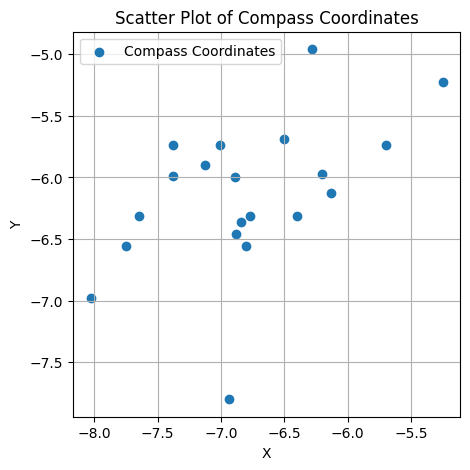

Mean of X: -6.795
Mean of Y: -6.137
Standard Deviation of X: 0.669
Standard Deviation of Y: 0.595


In [32]:
# Convert the data to numpy arrays
X = np.array(data['X'])
Y = np.array(data['Y'])

# Plotting
plt.figure(figsize=(5, 5))
plt.scatter(X, Y, label='Compass Coordinates')
plt.title('Scatter Plot of Compass Coordinates')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Calculate mean and standard deviation
mean_X = np.mean(X)
mean_Y = np.mean(Y)

std_dev_X = np.std(X)
std_dev_Y = np.std(Y)

print(f"Mean of X: {mean_X:.3f}")
print(f"Mean of Y: {mean_Y:.3f}")
print(f"Standard Deviation of X: {std_dev_X:.3f}")
print(f"Standard Deviation of Y: {std_dev_Y:.3f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


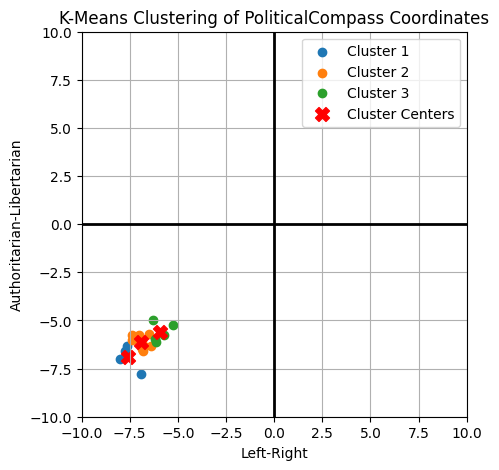

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Create a DataFrame with (X, Y) coordinates
df = pd.DataFrame({'Coordinates': list(zip(data['X'], data['Y']))})

# Select the X and Y columns for clustering
X = pd.DataFrame(df['Coordinates'].to_list(), columns=['X', 'Y'])

# Specify the number of clusters (you can adjust this based on your analysis)
num_clusters = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Colormap
colors = np.arange(len(data['Run']))

# Plotting
plt.figure(figsize=(5, 5))

# Add bold lines at the 0.0 x and y-axis positions
plt.axhline(y=0, color='black', linewidth=2)
plt.axvline(x=0, color='black', linewidth=2)

# Scatter plot with clusters
for cluster in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Coordinates'].apply(lambda x: x[0]), cluster_data['Coordinates'].apply(lambda x: x[1]), label=f'Cluster {cluster + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Cluster Centers')
plt.title('K-Means Clustering of PoliticalCompass Coordinates')
plt.xlabel('Left-Right')
plt.ylabel('Authoritarian-Libertarian')
plt.legend()
plt.grid(True)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')  # Set


In [ ]:
# Correlation between X and Y
correlation = df['X'].corr(df['Y'])
print(f"\nCorrelation between X and Y: {correlation:.4f}")

# Histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(df['X'], bins=10, edgecolor='black')
ax1.set_title('Histogram of X Coordinates')
ax1.set_xlabel('X Coordinate')
ax2.hist(df['Y'], bins=10, edgecolor='black')
ax2.set_title('Histogram of Y Coordinates')
ax2.set_xlabel('Y Coordinate')
plt.tight_layout()
plt.show()

# Test for normality
_, p_value_x = stats.normaltest(df['X'])
_, p_value_y = stats.normaltest(df['Y'])
print(f"\nNormality test p-value for X: {p_value_x:.4f}")
print(f"Normality test p-value for Y: {p_value_y:.4f}")

# Boxplot
plt.figure(figsize=(10, 6))
df.boxplot(column=['X', 'Y'])
plt.title('Boxplot of X and Y Coordinates')
plt.ylabel('Coordinate Value')
plt.show()

In [34]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'  # You can try other BERT models as well
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Example statement
statement = "Donald Trump is a great leader of America."

# Tokenize and encode the statement
inputs = tokenizer(statement, return_tensors='pt', truncation=True, padding=True)

# Forward pass through the model
outputs = model(**inputs)

# Get the predicted probabilities (apply softmax)
probs = softmax(outputs.logits, dim=1)

# The index with the highest probability corresponds to the predicted class
predicted_class = torch.argmax(probs)

# Map the predicted index to 'Left' or 'Right'
class_mapping = {0: 'Left', 1: 'Right'}
predicted_label = class_mapping[predicted_class.item()]

# Print the results
print("Predicted Label:", predicted_label)
print("Predicted Probabilities:", probs.tolist())


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted Label: Left
Predicted Probabilities: [[0.7423649430274963, 0.25763511657714844]]


In [35]:
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis")

# Example text for sentiment analysis
text = "Donald Trump is a great leader of America."

# Perform sentiment analysis
results = sentiment_analysis(text)

# Print the sentiment analysis result
for result in results:
    print(f"Sentiment: {result['label']}, Score: {result['score']:.4f}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Sentiment: POSITIVE, Score: 0.9998


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


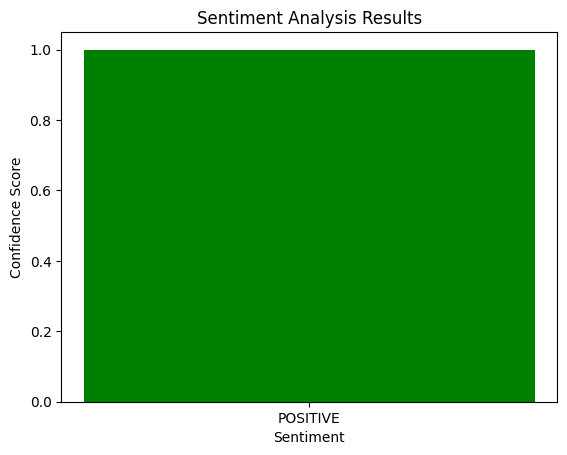

In [36]:
import matplotlib.pyplot as plt
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis")

# Example texts for sentiment analysis
texts = [
    "Donald Trump is a great leader of America."
]


texts = [
    "Japan and South Korea has a good political relationship"
]


# Perform sentiment analysis on each text
results = sentiment_analysis(texts)

# Extract sentiment labels and scores
sentiments = [result['label'] for result in results]
scores = [result['score'] for result in results]

# Create a bar chart
plt.bar(sentiments, scores, color=['green' if s == 'POSITIVE' else 'red' for s in sentiments])
plt.xlabel('Sentiment')
plt.ylabel('Confidence Score')
plt.title('Sentiment Analysis Results')
plt.show()


In [37]:
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis")

# Example political sentences
political_sentences = [
    "The new policy proposal has received widespread support.",
    "The opposition strongly criticizes the government's decision.",
    "The president's speech was well-received by the public.",
    "The controversial legislation has sparked heated debates.",
]

# Perform sentiment analysis on each political sentence
results = sentiment_analysis(political_sentences)

# Display the results
for sentence, result in zip(political_sentences, results):
    print(f"Sentence: {sentence}")
    print(f"Sentiment: {result['label']}, Score: {result['score']:.4f}")
    print()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Sentence: The new policy proposal has received widespread support.
Sentiment: POSITIVE, Score: 0.9997

Sentence: The opposition strongly criticizes the government's decision.
Sentiment: NEGATIVE, Score: 0.9930

Sentence: The president's speech was well-received by the public.
Sentiment: POSITIVE, Score: 0.9998

Sentence: The controversial legislation has sparked heated debates.
Sentiment: POSITIVE, Score: 0.9601



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


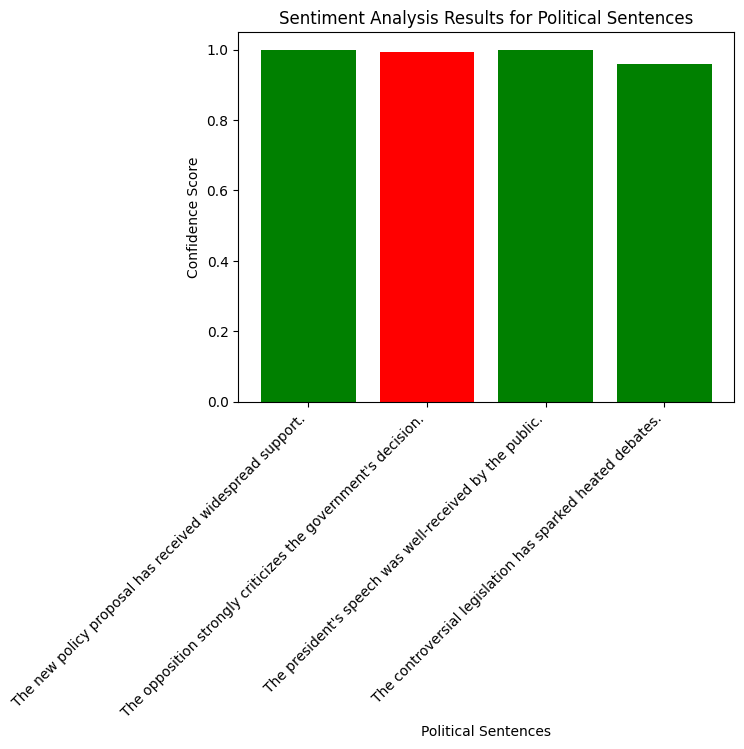

In [38]:
import matplotlib.pyplot as plt
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis")

# Example political sentences
political_sentences = [
    "The new policy proposal has received widespread support.",
    "The opposition strongly criticizes the government's decision.",
    "The president's speech was well-received by the public.",
    "The controversial legislation has sparked heated debates.",
]

# Perform sentiment analysis on each political sentence
results = sentiment_analysis(political_sentences)

# Extract sentiment labels and scores
sentiments = [result['label'] for result in results]
scores = [result['score'] for result in results]

# Create a bar chart
plt.bar(political_sentences, scores, color=['green' if s == 'POSITIVE' else 'red' for s in sentiments])
plt.xlabel('Political Sentences')
plt.ylabel('Confidence Score')
plt.title('Sentiment Analysis Results for Political Sentences')
plt.xticks(rotation=45, ha='right')
plt.show()


In [39]:
!pip install transformers shap

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Failed to read with utf-8 encoding. Trying next...
Successfully read the file with ISO-8859-1 encoding.

Top 10 most important features:
      feature  importance
0           D    0.436207
1           A    0.414341
2          SA    0.149451
3  Unnamed: 5    0.000000


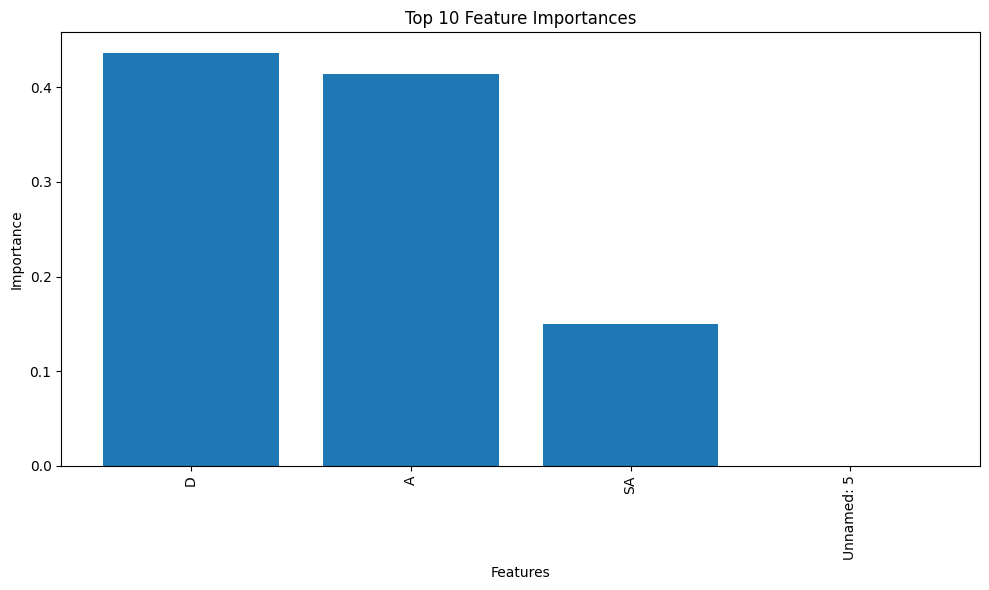

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import shap
import matplotlib.pyplot as plt

# List of encodings to try
encodings = ['utf-8', 'ISO-8859-1', 'windows-1252']

# Read the CSV file from your Google Drive
file_path = '/content/drive/My Drive/political_compass/Political_Compass_Dataset(Sheet3).csv'

# Try different encodings
for encoding in encodings:
    try:
        data = pd.read_csv(file_path, index_col=0, encoding=encoding)
        print(f"Successfully read the file with {encoding} encoding.")
        break
    except UnicodeDecodeError:
        print(f"Failed to read with {encoding} encoding. Trying next...")
else:
    raise ValueError("Failed to read the file with any of the specified encodings.")

#  Preprocess the data
response_map = {'SD': 0, 'D': 1, 'A': 2, 'SA': 3}
data = data.applymap(lambda x: response_map.get(x, x))

# Remove non-numeric columns
data = data.select_dtypes(include=[np.number])

# Separate features and target
# Let's assume we want to predict the first column
X = data.iloc[:, 1:]  # All columns except the first
y = data.iloc[:, 0]   # First column as target

# Handle NaN values in X
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Handle NaN values in y
y = y.fillna(y.mean())

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print the top 10 most important features
print("\nTop 10 most important features:")
print(feature_importance.head(10))

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import shap
from transformers import pipeline
import matplotlib.pyplot as plt

# Define a custom sentiment analysis model biased towards left-wing and libertarian views
# You might need to replace this with a model trained on your specific task and dataset
custom_model = pipeline("sentiment-analysis")

# Define a sentence for analysis
sentence = "If economic globalisation is inevitable, it should primarily serve humanity rather than the interests of trans-national corporations."

# Use SHAP to explain the model's prediction for the sentence
explainer = shap.Explainer(custom_model)
shap_values = explainer(sentence)

# Visualize Shapley values for the sentence
shap.summary_plot(shap_values.values, feature_names=sentence.split(), title="Shapley Values for Sentence")
plt.show()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
PartitionExplainer explainer:  25%|██▍       | 33/133 [00:20<01:40,  1.01s/it]